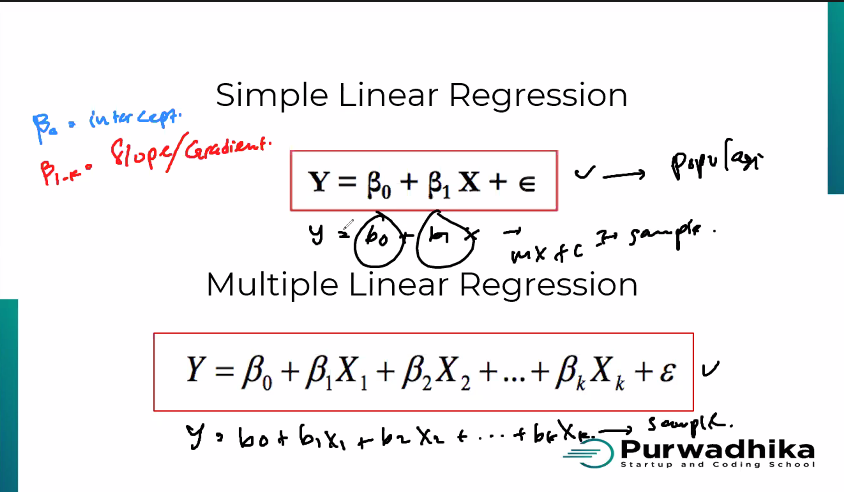

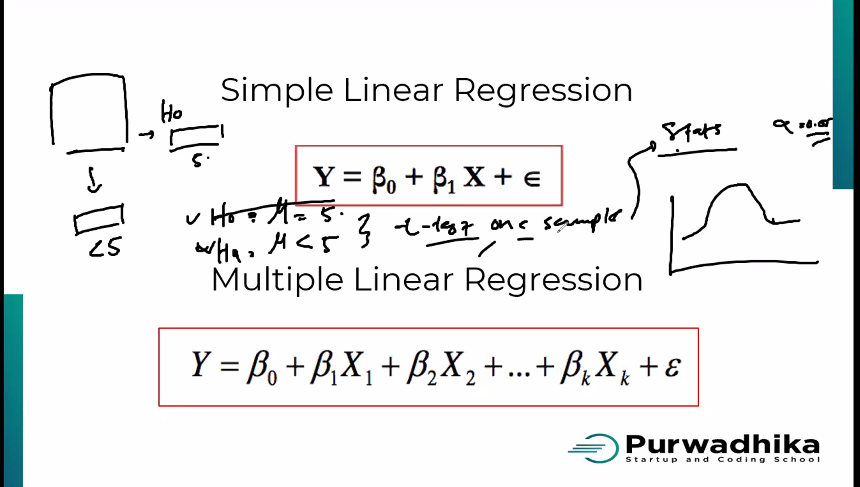

test 1 sample
test 2 sample
a/b testing

SSE = Sum Square Error, mengecilkan SSE

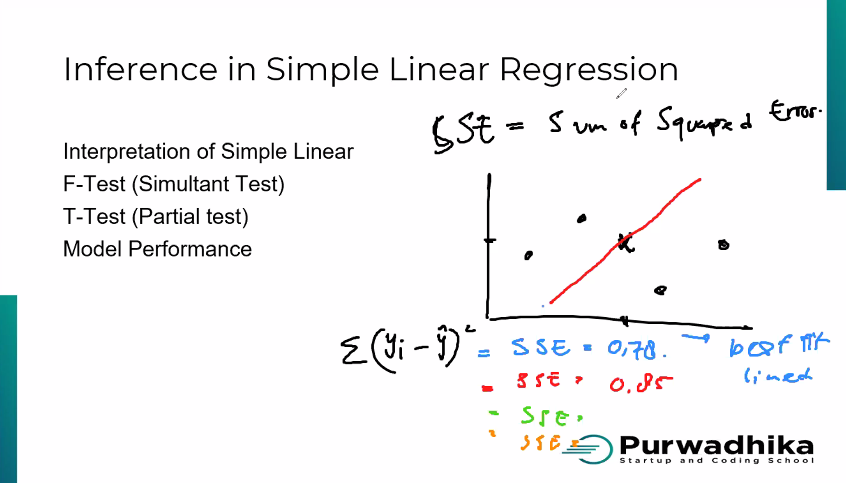

menghitung slope/gradient:
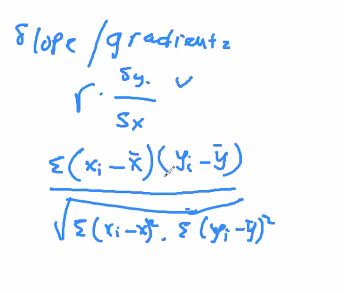

menghitung intercept & slope/gradient
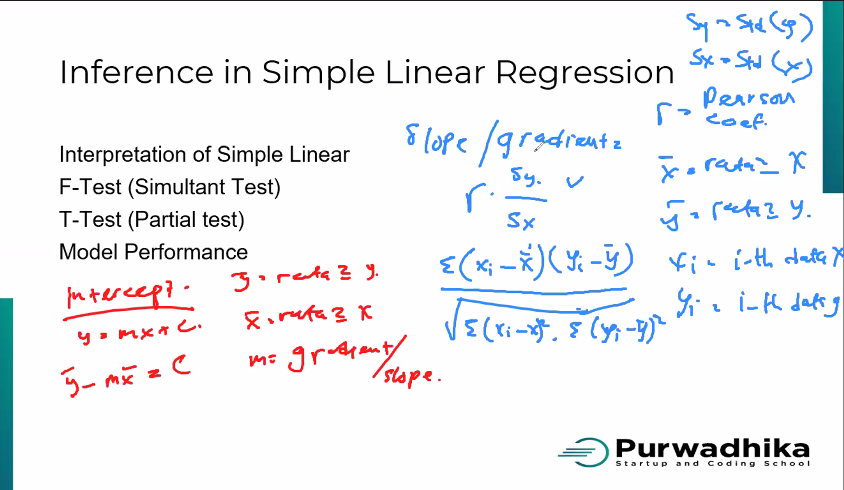

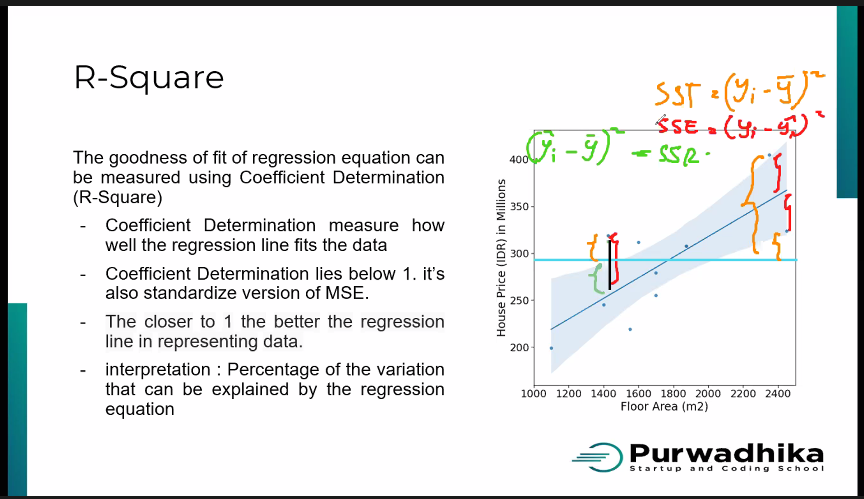

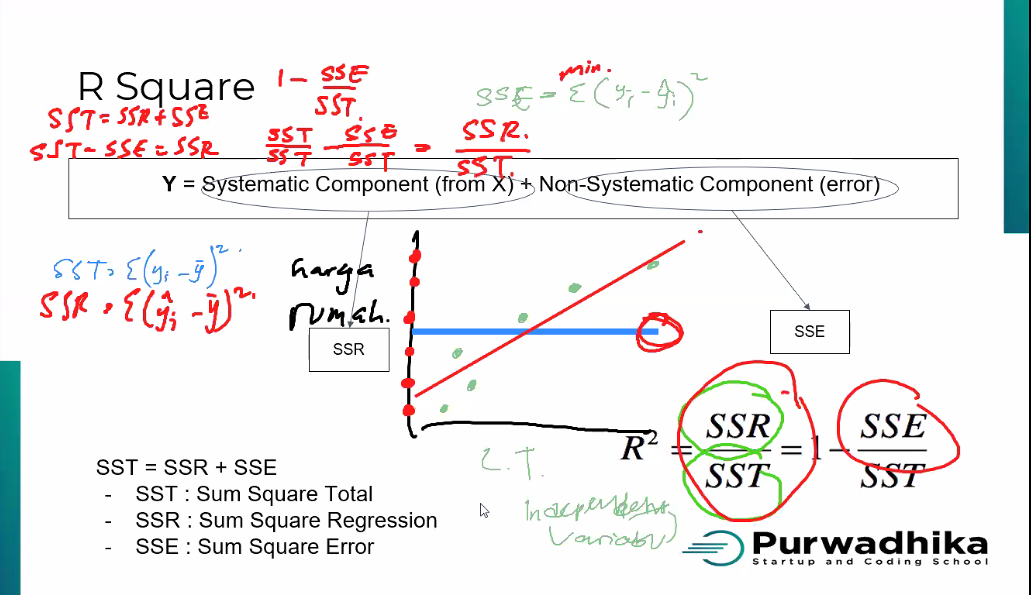

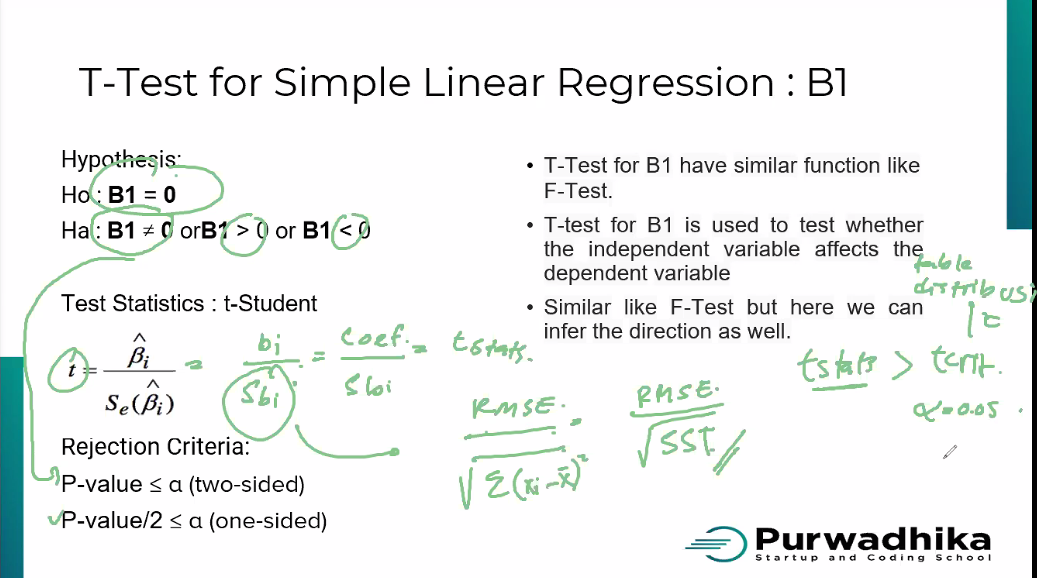

# Python Exercise: Simple Linear Regressiong
Analyze tips data from seaborn
- Total Bill as Independent Variable
- Tips as Dependent Variable
Analyze the relationship
Apply Simple Linear Regression
Perform F Test and T Test
Interpret the result
* use α 5% 

>## Library

In [ ]:
# !pip install statsmodels
# !pip uninstall statsmodels && !pip install statsmodels --upgrade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS # Linear Regression

>## Data

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips['tip total_bill'.split()].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


> ## Simple Linear Regression

In [3]:
tips['tip total_bill'.split()].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [4]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


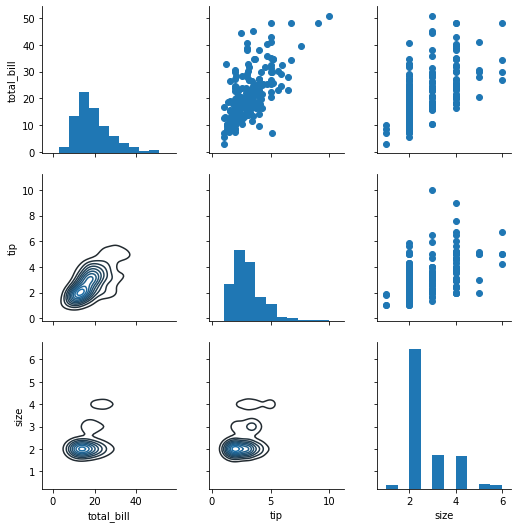

In [13]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

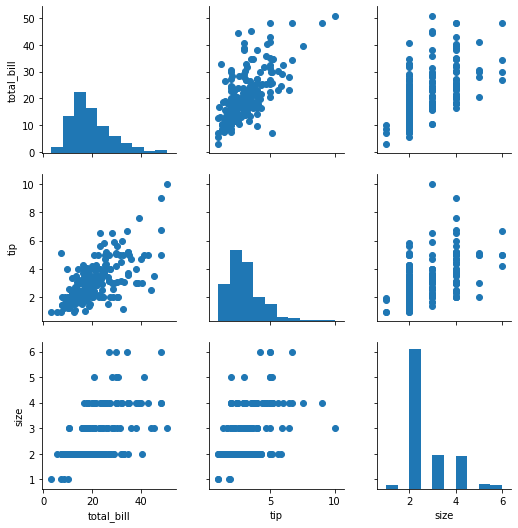

In [14]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)

plt.show()

> ## Multiple LInear Regression
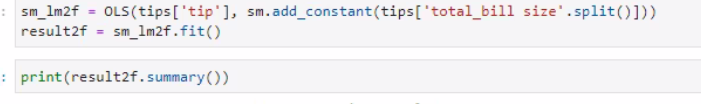

In [18]:
sm_lm2f = OLS(tips['tip'], sm.add_constant(tips['total_bill size'.split()]))
result2f = sm_lm2f.fit()

In [19]:
print(result2f.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           9.67e-34
Time:                        21:38:33   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

In [7]:
df_categorical = pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta','Bogor','Bogor','Bekasi','Bekasi','Jakarta','Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income': [20000000,15000000,7000000,9000000,12000000,11000000,9000000]
})
df_categorical

,Gender,City,Age,Income
0,Male,Jakarta,34,20000000
1,Female,Bogor,28,15000000
2,Female,Bogor,23,7000000
3,Male,Bekasi,26,9000000
4,Female,Bekasi,29,12000000
5,Female,Jakarta,25,11000000
6,Male,Bekasi,25,9000000


In [8]:
#                     positional argument  keyword_argument
df_dummy = pd.get_dummies(df_categorical, drop_first=True)
df_dummy

,Age,Income,Gender_Male,City_Bogor,City_Jakarta
0,34,20000000,1,0,1
1,28,15000000,0,1,0
2,23,7000000,0,1,0
3,26,9000000,1,0,0
4,29,12000000,0,0,0
5,25,11000000,0,0,1
6,25,9000000,1,0,0


In [9]:
sm_lm_dum = OLS(df_dummy['Income'], sm.add_constant(df_dummy.drop('Income', axis=1)))
result_dum = sm_lm_dum.fit()

In [11]:
print(result_dum.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     12.20
Date:                Thu, 11 Feb 2021   Prob (F-statistic):             0.0772
Time:                        21:01:34   Log-Likelihood:                -105.17
No. Observations:                   7   AIC:                             220.3
Df Residuals:                       2   BIC:                             220.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.916e+07   5.24e+06     -3.657   

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


>## Dummy Variable Preprocessing
We need to do dummy variable preprocessing for the categorical variable such as sex, smoker, day and time

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips_dummy = pd.get_dummies(tips, drop_first=True, columns='sex smoker day time'.split())
tips_dummy

NameError: name 'pd' is not defined

In [16]:
fitur = tips_dummy.drop('tip', axis=1).columns
target = 'tip'

sm_lm_tip = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result_tip_dum = sm_lm_tip.fit()

In [17]:
print(result_tip_dum.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.20e-28
Time:                        21:08:21   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)

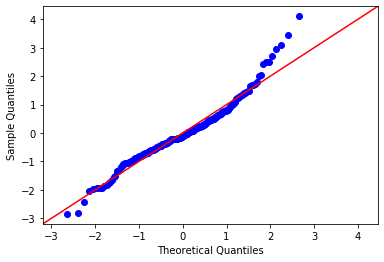

In [18]:
sm.qqplot(result_tip_dum.resid, line='45')
plt.show()

In [19]:
s, p = stats.shapiro(result_tip_dum.resid)

if p < 0.05:
    print('Not Normal')
else:
    print('Normal')

NameError: name 'stats' is not defined

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(result_tip_dum.fittedvalues, result_tip_dum.resid)
sns.lineplot(result_tip_dum.fittedvalues, 0)
plt.xlabel('Fitted Values')

### Contoh prediksi linear regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Logistic Regression

In [2]:
df = pd.read_csv('data/Data/bankloan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
features = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [4]:
X = df[features]
y = df[target]

In [5]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


### Modelling

In [6]:
import statsmodels.api as sm

In [7]:
sm_logit = sm.Logit(y, sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [8]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.2844
Time:                        19:10:50   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

- LLR p-value: tidak semua variabel sama dengan 0

### Collinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif

In [11]:
calc_vif(X)

,variable,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


### Model Interpretation

In [12]:
# employ feature interpretation
1/np.exp(-0.2436 * 1)

# employ = ketika employment meningkat 1 tahun, dan tidak ada perubahan pada variable yang lain, maka risiko untuk default akan turun 1.275 x
# semakin orang lama kerja, orang semakin mapan dan bisa membayar utang

1.2758338948511925

In [13]:
# debtinc feature interpretation
np.exp(0.0885 * 1)

# debtinc = ketika ratio debt income naik 1, dan tidak ada perubahan pada variable yang lain, maka risiko default akan naik 1.0925 x

1.0925342526104793

In [14]:
# creddebt feature interpretation
np.exp(0.5041 * 5)

# creddebt = ketika creddebt naik $5 dan tidak ada perubahan pada variable lain, maka risiko default akan naik 12.43x
# creddebt = nasabah yang memiliki creddebt $10 memiliki risiko default 12.43x lebih tinggi daripada nasabah yang memiliki creddebt $5

12.434812515742879

### Validation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

In [17]:
y['default'].value_counts(normalize=True)

0    0.738571
1    0.261429
Name: default, dtype: float64

In [18]:
y_train['default'].value_counts(normalize=True)

0    0.739286
1    0.260714
Name: default, dtype: float64

In [19]:
y_test['default'].value_counts(normalize=True)

0    0.735714
1    0.264286
Name: default, dtype: float64

In [20]:
y_train.index

Int64Index([382, 344, 265,  52, 370, 272, 216, 571, 502, 408,
            ...
            607, 650, 271, 233, 659, 476, 135, 506, 684, 584],
           dtype='int64', length=560)

In [21]:
y_test.index

Int64Index([118, 309, 339, 686, 639, 547, 425, 195,   4, 207,
            ...
            430,  66,  26, 606, 253, 597,  58, 467, 148, 681],
           dtype='int64', length=140)

In [23]:
sm_logit_train = sm.Logit(y_train, sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.411145
         Iterations 7


In [24]:
y_predict = result_train.predict(sm.add_constant(X_test))

In [25]:
y_predict

118    0.584807
309    0.308932
339    0.308407
686    0.398796
639    0.236440
         ...   
597    0.544007
58     0.012081
467    0.102066
148    0.060111
681    0.214943
Length: 140, dtype: float64

In [26]:
y_predict_class = np.where(y_predict > 0.5, 1, 0)
y_predict_class

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0])

In [27]:
accuracy_score(y_test, y_predict_class)

0.8214285714285714

In [29]:
confusion_matrix(y_test, y_predict_class)

array([[98,  5],
       [20, 17]], dtype=int64)

In [33]:
def make_confusion_matrix(confusion): 
    tn, fp, fn, tp = confusion.flatten()
    confusion_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]}, 
                                index=['a_0', 'a_1', 'total_prediction'])
    return confusion_df

In [35]:
make_confusion_matrix(confusion_matrix(y_test, y_predict_class))

,p_0,p_1,total_actual
a_0,98,5,103
a_1,20,17,37
total_prediction,118,22,140


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logit_sklearn = LogisticRegression()
logit_sklearn.fit(X_train, y_train)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
logit_sklearn.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [39]:
logit_sklearn.predict_proba(X_test)

array([[0.41595263, 0.58404737],
       [0.69115483, 0.30884517],
       [0.69051358, 0.30948642],
       [0.60200296, 0.39799704],
       [0.76360311, 0.23639689],
       [0.6490779 , 0.3509221 ],
       [0.95110997, 0.04889003],
       [0.83093583, 0.16906417],
       [0.34810286, 0.65189714],
       [0.9240855 , 0.0759145 ],
       [0.91375385, 0.08624615],
       [0.89760334, 0.10239666],
       [0.87771933, 0.12228067],
       [0.55399298, 0.44600702],
       [0.94299969, 0.05700031],
       [0.6630743 , 0.3369257 ],
       [0.81400267, 0.18599733],
       [0.72530397, 0.27469603],
       [0.95801621, 0.04198379],
       [0.34270018, 0.65729982],
       [0.73977686, 0.26022314],
       [0.51036404, 0.48963596],
       [0.91203866, 0.08796134],
       [0.9789    , 0.0211    ],
       [0.78416218, 0.21583782],
       [0.57823161, 0.42176839],
       [0.6718621 , 0.3281379 ],
       [0.57439232, 0.42560768],
       [0.29676804, 0.70323196],
       [0.81493979, 0.18506021],
       [0.

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
iris_x = iris.drop('target', axis=1)
iris_y = iris['target']

xtr, xts, ytr, yts = train_test_split(iris_x, iris_y, stratify=iris_y, test_size=0.2, random_state=2020)

KeyError: "['target'] not found in axis"

In [ ]:
logit_iris = LogisticRegression()
logit_iris.fit(xtr, ytr)

In [ ]:
proba_iris = logit_iris.predict_proba(xts)
class_iris = logit_iris.predict(xts)

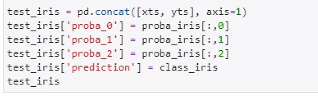

In [ ]:
test_iris = pd.concat([xts, yts], axis=1)
test_iris[['proba_0']]

In [ ]:
accuracy_score(test_iris['target'], test_iris['prediction'])